In [65]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import spiceypy
import datetime

In [66]:
spiceypy.furnsh("../Earth/kernels/lsk/naif0012.tls")
spiceypy.furnsh("../Earth/kernels/pck/pck00010.tpc")
spiceypy.furnsh("../Earth/kernels/spk/de432s.bsp")

In [67]:
init_time_utc=datetime.datetime(year=2000,month=1,day=1,hour=0,minute=0,second=0)

delta_days=10000

end_time_utc=init_time_utc + datetime.timedelta(days=delta_days)

In [70]:
init_time_utc_str=init_time_utc.strftime("%Y-%m-%dT%H:%M:%S")
end_time_utc_str=end_time_utc.strftime("%Y-%m-%dT%H:%M:%S")

In [72]:
init_time_et=spiceypy.utc2et(init_time_utc_str)
end_time_et=spiceypy.utc2et(end_time_utc_str)

In [73]:
time_interval_et=np.linspace(init_time_et,end_time_et,delta_days)



In [74]:
_,radii_sun=spiceypy.bodvcd(bodyid=10,item="RADII",maxn=3)

radii_sun=radii_sun[0]

In [75]:
solar_system_df=pd.DataFrame()

solar_system_df.loc[:,"ET"]=time_interval_et

solar_system_df.loc[:,"UTC"]= \
    solar_system_df["ET"].apply(lambda x:spiceypy.et2datetime(et=x).date())
    
solar_system_df.loc[:,"POS_SSB_WRT_SUN"] = \
    solar_system_df['ET'].apply(lambda x: spiceypy.spkgps(targ=0,
                                                          et=x,
                                                          ref="ECLIPJ2000",
                                                          obs=10)[0]) 

solar_system_df.loc[:,"POS_SSB_WRT_SUN_SCALED"]= \
    solar_system_df["POS_SSB_WRT_SUN"].apply(lambda x: x / radii_sun)
    
solar_system_df.loc[:,"SSB_WRT_SUN_SCALED_DIST"]= \
    solar_system_df["POS_SSB_WRT_SUN_SCALED"].apply(lambda x: spiceypy.vnorm(x))    
            

print(solar_system_df)

                ET         UTC  \
0    -4.313582e+04  2000-01-01   
1     4.327283e+04  2000-01-02   
2     1.296815e+05  2000-01-03   
3     2.160901e+05  2000-01-04   
4     3.024987e+05  2000-01-05   
...            ...         ...   
9995  8.636112e+08  2027-05-14   
9996  8.636976e+08  2027-05-15   
9997  8.637841e+08  2027-05-16   
9998  8.638705e+08  2027-05-17   
9999  8.639569e+08  2027-05-19   

                                        POS_SSB_WRT_SUN  \
0     [1068000.1891061615, 417680.9418664607, -30844...   
1     [1067195.5017360714, 418789.11029741366, -3083...   
2     [1066389.5596805303, 419896.06924681185, -3081...   
3     [1065582.365061001, 421001.82313176966, -30802...   
4     [1064773.9198190796, 422106.3763607678, -30788...   
...                                                 ...   
9995  [4663.265215005825, 653522.8491930669, -10147....   
9996  [3986.9114982562483, 652910.4356407273, -10131...   
9997  [3311.597377454852, 652297.295702135, -10115.7...   
9

In [76]:
print(solar_system_df["SSB_WRT_SUN_SCALED_DIST"])

0       1.648254
1       1.647758
2       1.647262
3       1.646766
4       1.646269
          ...   
9995    0.939107
9996    0.938220
9997    0.937334
9998    0.936447
9999    0.935560
Name: SSB_WRT_SUN_SCALED_DIST, Length: 10000, dtype: float64


In [77]:
NAIF_ID_DICT={"JUP":5,"SAT":6}

for planets_name_key in NAIF_ID_DICT:
    
    planet_pos_col=f"POS_{planets_name_key}_WRT_SUN"
    planet_angle_col=f"PHASE_ANGLE_SUN_{planets_name_key}2SSB"
    
    planet_id=NAIF_ID_DICT[planets_name_key]
    
    solar_system_df.loc[:,planet_pos_col] = \
    solar_system_df['ET'].apply(lambda x: spiceypy.spkgps(targ=planet_id,
                                                          et=x,
                                                          ref="ECLIPJ2000",
                                                          obs=10)[0])
    
    solar_system_df.loc[:,planet_angle_col]=\
        solar_system_df.apply(lambda x: np.degrees(spiceypy.vsep(x[planet_pos_col],
                                                      x["POS_SSB_WRT_SUN"])),
                              axis=1)



In [78]:
print(solar_system_df["PHASE_ANGLE_SUN_JUP2SSB"])

0       14.889534
1       14.914467
2       14.939388
3       14.964298
4       14.989197
          ...    
9995    59.360113
9996    59.378969
9997    59.397796
9998    59.416597
9999    59.435370
Name: PHASE_ANGLE_SUN_JUP2SSB, Length: 10000, dtype: float64


In [79]:
print(solar_system_df)

                ET         UTC  \
0    -4.313582e+04  2000-01-01   
1     4.327283e+04  2000-01-02   
2     1.296815e+05  2000-01-03   
3     2.160901e+05  2000-01-04   
4     3.024987e+05  2000-01-05   
...            ...         ...   
9995  8.636112e+08  2027-05-14   
9996  8.636976e+08  2027-05-15   
9997  8.637841e+08  2027-05-16   
9998  8.638705e+08  2027-05-17   
9999  8.639569e+08  2027-05-19   

                                        POS_SSB_WRT_SUN  \
0     [1068000.1891061615, 417680.9418664607, -30844...   
1     [1067195.5017360714, 418789.11029741366, -3083...   
2     [1066389.5596805303, 419896.06924681185, -3081...   
3     [1065582.365061001, 421001.82313176966, -30802...   
4     [1064773.9198190796, 422106.3763607678, -30788...   
...                                                 ...   
9995  [4663.265215005825, 653522.8491930669, -10147....   
9996  [3986.9114982562483, 652910.4356407273, -10131...   
9997  [3311.597377454852, 652297.295702135, -10115.7...   
9

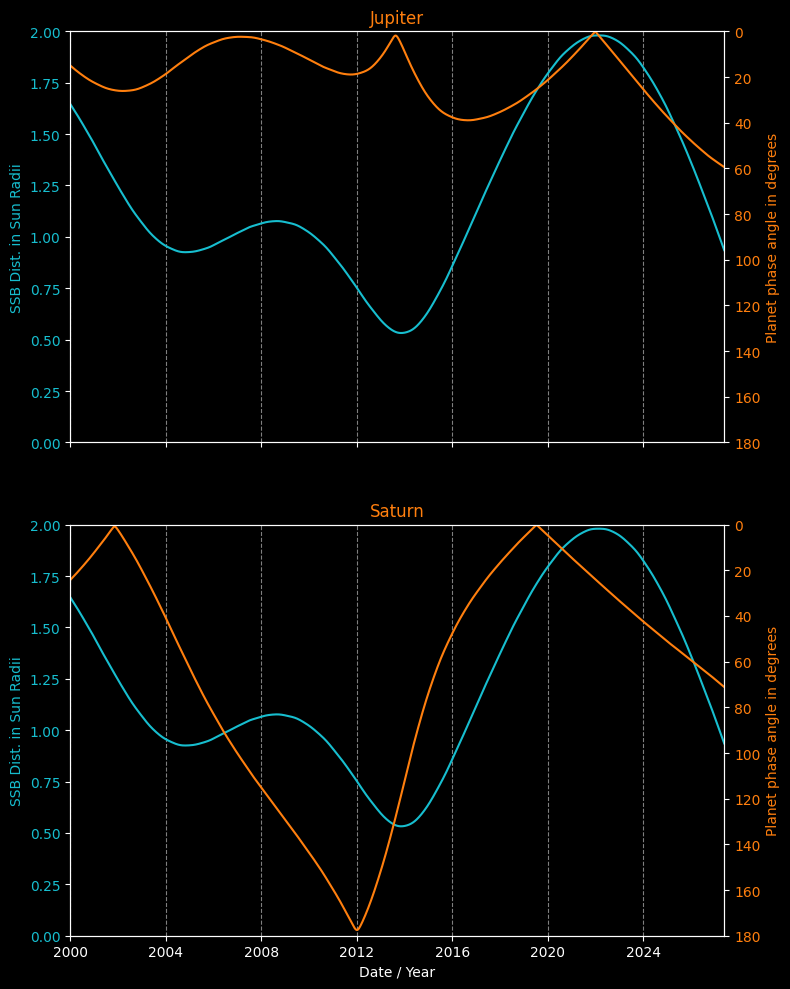

In [86]:
x=solar_system_df["UTC"]
y=solar_system_df["SSB_WRT_SUN_SCALED_DIST"]
plt.style.use("dark_background")

fig, (ax1,ax2)=plt.subplots(2,1,sharex=True ,figsize=(8,10))

for ax_f,planet_abr,planet_name in zip([ax1,ax2],
                                       ["JUP","SAT"],
                                       ["Jupiter","Saturn"]):
    ax_f.set_title(planet_name,color="tab:orange")
    
    ax_f.plot(x,y,color="tab:cyan")
    
    
    ax_f.set_ylabel("SSB Dist. in Sun Radii",color="tab:cyan")
    ax_f.tick_params(axis="y",labelcolor="tab:cyan")
    
    ax_f.set_xlim(min(solar_system_df["UTC"]),max(solar_system_df["UTC"]))
    ax_f.set_ylim(0,2)
    
    ax_f_add=ax_f.twinx()
    
    ax_f_add.plot(solar_system_df["UTC"],
                  solar_system_df[f"PHASE_ANGLE_SUN_{planet_abr}2SSB"],
                  color="tab:orange")
    
    
    ax_f_add.set_ylabel("Planet phase angle in degrees",color="tab:orange")
    ax_f_add.tick_params(axis="y",labelcolor="tab:orange")
    
    ax_f_add.invert_yaxis()
    ax_f_add.set_ylim(180,0)
    
    ax_f.grid(axis="x",linestyle="dashed",alpha=0.5)
    
ax2.set_xlabel("Date / Year")

fig.tight_layout()

plt.subplots_adjust(hspace=0.2)
    
    
    